## Plotting using nxviz

Now, you're going to practice creating a circos plot using nxviz! As a bonus preview of what's coming up in the next video, there's a little segment on the bipartite keyword in this exercise!

Here, the degree centrality score of each node has been added to their metadata dictionary for you using the following code:

<code>
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
for n in G.nodes():
    G.nodes[n]['centrality'] = dcs[n]
</code>

If you want a refresher on degree centrality, check out the relevant video from the previous course - it is a way of computing the importance of a node!

nxviz has been pre-imported for you as nv, along with NetworkX (as nx) and matplotlib.pyplot (as plt).

### Instructions
    - Plot the network G using a circos plot. To do this:
    - Create a circos plot called c using the nv.circos() function. You have to specify the parameters graph and node_color_by and group_by keyword arguments to color and group nodes by their keyword bipartite, and the sort_by argument to order the nodes by centrality.
    - To ensure that the nodes are visible when displayed, we have included the argument node_enc_kwargs={'radius': 10}.
    - Draw c to the screen.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, date
import networkx as nx
import nxviz as nv

github_file_path = "../../data/github_users.p"

with open(github_file_path, 'rb') as f:
    Gh = pickle.load(f)

In [26]:
dcs = nx.degree_centrality(Gh)
for n in Gh.nodes(data=True):
    n[1]["centrality"] = dcs[n[0]]

G = list(Gh.nodes(data=True))[:2000]


AttributeError: 'list' object has no attribute 'nodes'

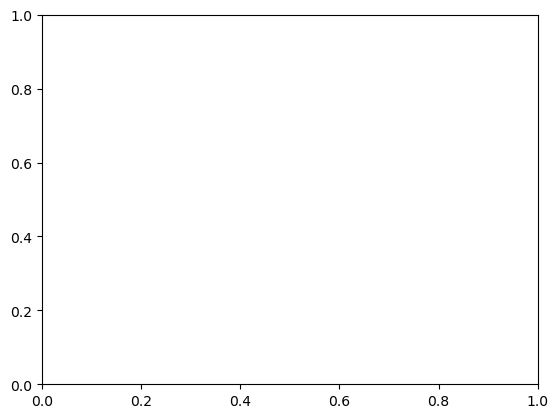

In [24]:
# Create the CircosPlot object: c
c = nv.circos(G, node_color_by="bipartite", group_by="bipartite", sort_by="centrality", node_enc_kwargs={'radius': 10})

# Display the plot
#c.draw()
plt.show()

## The bipartite keyword

In the video, Eric introduced you to the 'bipartite' keyword. This keyword is part of a node's metadata dictionary, and can be assigned both when you add a node and after the node is added. Remember, though, that by definition, in a bipartite graph, a node cannot be connected to another node in the same partition.

Here, you're going to write a function that returns the nodes from a given partition in a bipartite graph. In this case, the relevant partitions of the Github bipartite graph you'll be working with are 'projects' and 'users'.

### Instructions
    - Write a function called get_nodes_from_partition() which accepts two arguments - a bipartite graph G and a partition of G - and returns just the nodes from that partition.
        - Iterate over all the nodes of G (not including the metadata) using a for loop.
        - Access the 'bipartite' keyword of the current node's metadata dictionary. If it equals partition, append the current node to the list nodes.
    - Use your get_nodes_from_partition() function together with the len() function to:
        - Print the number of nodes in the 'projects' partition of G.
        - Print the number of nodes in the 'users' partition of G.

In [ ]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))

## Degree centrality distribution of user nodes

In this exercise and the next one, you're going to do a final recap of material from the previous course. Your task is to plot the degree centrality distributions for each node partition in the bipartite version of the GitHub collaboration network. Here, you'll do this for the 'users' partition. In the next exercise, you'll do this for the 'projects' partition.

The function you wrote before, get_nodes_from_partition(), has been loaded for you. Just to remind you, the "degree centrality" is a measure of node importance, and the "degree centrality distribution" is the list of degree centrality scores for all nodes in the graph. A few exercises ago, when you made the circos plot, we computed the degree centralities for you. You'll now practice doing this yourself!

### Instructions
    - Import matplotlib.pyplot as plt.
    - Use your get_nodes_from_partition() function from the previous exercise to get a list called user_nodes corresponding to the 'users' nodes of G.
    - Using the nx.degree_centrality() function, compute the degree centralities for each node in G. Store the result as dcs.
    - Use a list comprehension to compute the degree centralities for each node in user_nodes. Store the result as user_dcs.
        - Remember, dcs is a dictionary, in which the keys are the nodes. The relevant nodes here are contained in user_nodes. How can you use this information to obtain the degree centralities of the user nodes? Use n as your iterator variable.
    - Plot a histogram of the degree distribution of users, using plt.hist() and user_dcs.

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

## Degree centrality distribution of project nodes

Now it's time to plot the degree centrality distribution for the 'projects' partition of G. The steps to do this are exactly the same as in the previous exercise. For your convenience, matplotlib.pyplot has been pre-imported as plt.

Go for it!

### Instructions
    - Obtain a list called project_nodes corresponding to the 'projects' nodes of G.
    - Using the nx.degree_centrality() function, compute the degree centralities for each node in G. Store the result as dcs.
    - Use a list comprehension to compute the degree centralities for each node in project_nodes. Store the result as project_dcs.
    - Plot a histogram of the degree distribution of projects, using plt.hist() and project_dcs.

In [ ]:
# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()